<a href="https://colab.research.google.com/github/amira123bd/Traitement_D-image_Filtrage_PH_PB_Canny_-_Sobel/blob/master/Traitement_d'image_Filtrage_Canny_%26_Sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Chargement de l'image de cellules
On se propose tout au long de ce TP d'essayer de manipuler l'image de cellules qu'on a déjà utilisé lors d'un précédent TP.
Nous allons d'abord importer les bibliothèques qui nous seront utiles

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow, get_cmap
#from skimage import data
from PIL import Image, ImageDraw

# Question : 
Importez l'image et assurez-vous qu'elle est bien en niveaux de gris, puis affichez-là.

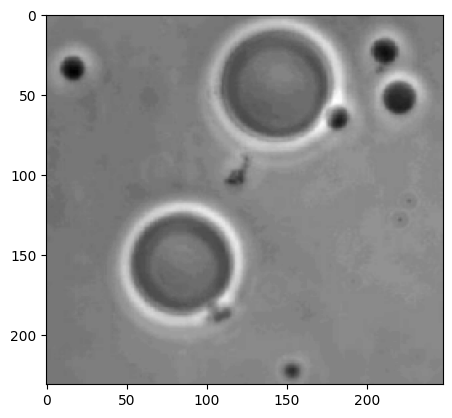

In [25]:
def displayTwoImages(im1,im2):
  _,axes=plt.subplots(ncols=2)
  axes[0].imshow(im1,cmap=plt.get_cmap('gray'))
  axes[1].imshow(im2,cmap=plt.get_cmap('gray'))


path ='/content/cell_image.png'
image=cv2.imread(path)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(gray_img,cmap=get_cmap('gray'))



# II. Affichage du spectre d'amplitude

# Question 1
Utilisez la fonction fft.fft2() de numpy pour récupérer les données de l'image dans le domaine fréquentiel.

Le '2' dans fft2() indique que nous utilisons la transformée de Fourrier en 2 dimensions. Son premier argument est l’image d’entrée, qui est en niveaux de gris. Le second argument est optionnel et décide de la taille du tableau de sortie.


In [26]:
freq=np.fft.fft2(gray_img)
##imshow(freq)

# Question 2
Si vous essayez d'afficher l'image, cela ne marchera pas, pourquoi?


▶ On a essayé de visualiser l'image et une erreur **TypeError: Image data of dtype complex128 cannot be converted to float** apparaitre 


▶ car elle contient des valeurs complexes qui ne seront pas significatif(==> visualisation du spectre d'amplitude)

# Question 3
Centrez les données autour de 0 en appliquant la fonction fft.fftshift() sur les fréquences.

In [27]:
## centrez les données autour de 0 pour une meilleure visualisation
shift_freq=np.fft.fftshift(freq)

# Question 4
Calculez le spectre de magnitude. 
Affichez l'image originale et son spectre d'amplitude (en nuances de gris).

On donne le spectre de magnitude par la formule suivante :
magnitude_spectrum = 20*np.log(np.abs(shifted_freq))

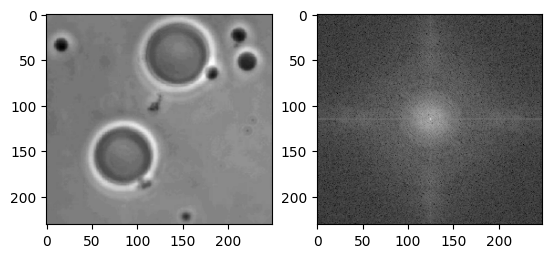

In [28]:
mag_spectrum =20*np.log(np.abs(shift_freq))
displayTwoImages(gray_img,mag_spectrum)

# III. Filtrage fréquentiel : Filtre passe-haut
Nous pouvons maintenant effectuer certaines opérations dans le domaine fréquentiel, comme le filtrage passe-haut et reconstruire l’image après filtrage en utilisant la Transformée de Fourrier inverse.

1. Supprimez les basses fréquences en masquant avec une fenêtre rectangulaire de taille 20x20. 
2. Appliquez le décalage inverse en utilisant ifftshift() (En d'autres termes, inverser l'operation qui a permis de centrer les données autour de 0). 
3. Calculez la FFT inverse en utilisant la fonction ifft2(). Le résultat, encore une fois, sera un chiffre complexe. 
4. Affichez la valeur absolue du résultat.

In [29]:
## Supression des basses fréquences en utlisant une fenetre de masque 20*20
rows, cols = gray_img.shape
crow,ccol=rows/2,cols/2

shift_freq[int(crow-10):int(crow+10),int(ccol-10):int(ccol+10)]=0



In [30]:
unshift_freq= np.fft.ifftshift(shift_freq)


In [31]:
backward=np.fft.ifft2(unshift_freq)


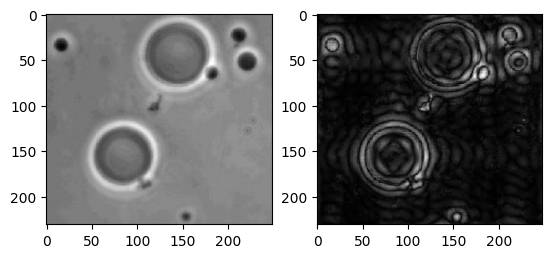

In [32]:
HP_result=np.abs(backward)

displayTwoImages(gray_img, HP_result)


==> **filtrage passe haut 
probleme : On remarque qu'il y'a des zones ou le contour n'est pas arrondie et ça c'est du au filtre de nature rectangulaire et par suite un filtre circulaire peut résoudre ce probléme**

# IV. Filtrage fréquentiel : Filtre passe-bas
Comme expliqué en cours, un filtre passe bas est le complémentaire d'un filtre pass-haut. 
Nous allons commencer par appliquer un filtre passe-bas rectangulaire. 

# Question 1
1. Commencez par créer une image de 0s (ou de 1 mais vous devrez faire le complémentaire plus tard) de la taille de votre image de cellule. 
2. Mettez-à 1 une fenêtre rectangulaire (au centre de l'image) dont le côté mesure 20 pixels 
3. Affichez le masque

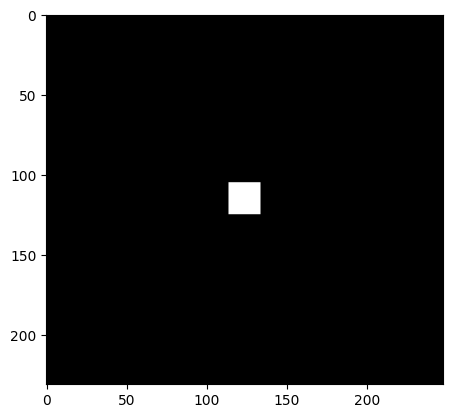

In [33]:
low_pass_rect=np.ones(graying.shape)

### Recuperation des centres
crow,ccol = rows/2,cols/2
low_pass_rect[int(crow-10):int(crow+10),int(ccol-10):int(ccol+10)]=0
##prendre le compl
low_pass_rect=1-low_pass_rect 
imshow(low_pass_rect,cmap=get_cmap('gray'))

# Question 2
1. Appliquez ce filtre sur le spectre de l'image 
2. Retrouvez comme fait précédemment l'image filtrée par Transformée de Fourrier Inverse.
3. Que remarquez-vous au niveau du résultat, en plus du fait que l'image de sortie soit fortement lissée?

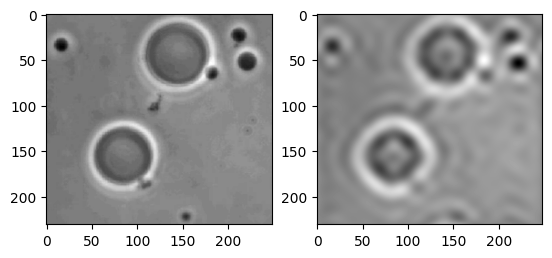

In [35]:
shift_freq=np.fft.fftshift(freq)
LP_filter_rect=np.multiply(shift_freq,low_pass_rect)

LP_result_rect=np.fft.ifft2(np.fft.ifftshift(LP_filter_rect))
LP_result_rect=np.abs(LP_result_rect)

displayTwoImages(gray_img,LP_result_rect )

Votre commentaire: 

▶ L'effet du filtre passe bas rectangulaire est visible 

▶ De plus l'image est fortement lissé et pour diminuer le lissage il suffit de masquer avec une fenetre de taille plus grande pour prendre plus de fréquences et ne soit pas sélective.


# Question 3
Nous allons maintenant créer un filtre passe-bas circulaire. 
1. Executez le code ci-dessous 
2. Affichez l'image originale et l'image résultante du filtrage.
3. Commentez le résultat en comparant le filtre pass-bas rectangulaire et circulaire.

Voici le code correspondant : 

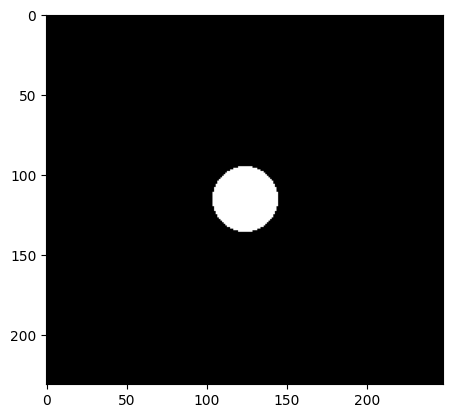

In [37]:

#Créer un filtre passe bas non rectangulaire, mais circulaire
x,y = gray_img.shape[0],gray_img.shape[1]
#size of circle
e_x,e_y=40,40

#Donnez les paramètres de l'ellipse (cercle) que vous souhaitez créer
#Attention: le repère de l'image et d'une figure sont différents : (x,y) devient (y,x)!!!
bbox=((y/2)-(e_y/2),(x/2)-(e_x/2),(y/2)+(e_y/2),(x/2)+(e_x/2))

#Créer l'image noire initiale du masque
low_pass=Image.new("L",(y,x),color=0) #L : single channel mode

#Ajoutez le cercle et le remplir par des 1s
draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)
#Affichez votre image correspondant au masque
imshow(low_pass, cmap=get_cmap('gray'))

#multipliez les 2 images
shift_freq = np.fft.fftshift(freq)
LP_filter= np.multiply(shift_freq,low_pass)

#Undo le décalage du spectre et appliquez ifft2
LP_result= np.fft.ifft2(np.fft.ifftshift(LP_filter))
LP_result= np.abs(LP_result)

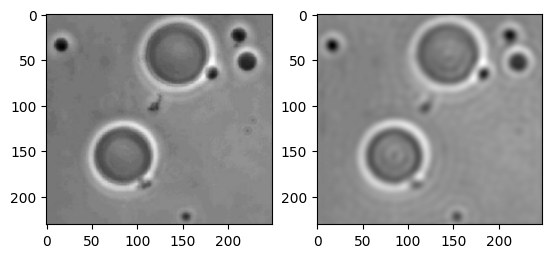

In [42]:
#Affichez l'image
displayTwoImages(gray_img,LP_result )


Text(0.5, 1.0, 'Masque rectangulaire vs masque circulaire                                                   ')

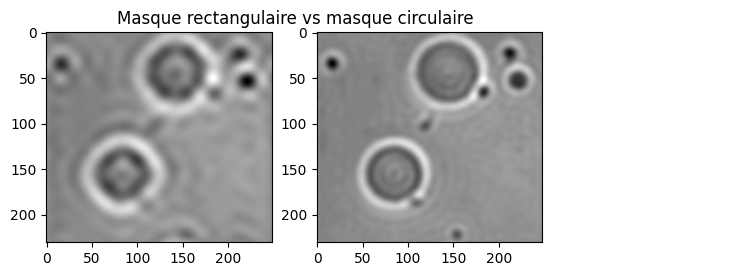

In [45]:
displayTwoImages(LP_result_rect,LP_result )
plt.title("Masque rectangulaire vs masque circulaire                                                   ")

**Commentaire:**

▶Pour le résultat du filtre passe bas rectangulaire l'effet du rectangle est visible alors que dans le cas du filtre circulaire elle n'est plus visible, et ca est du au fait que le filtre passe bas circulaire atténue les hautes fréquences d'une maniére plus douce ce qui réduit les effets indésirables

# V. Détection de contours et de coins

Maintenant, notre objectif est de détecter les contours des cellules en essayant d'appliquer les opérateurs: Sobel et Canny
1. Appliquez d'abord un lissage Gaussien de taille 3x3 à l'aide de la fonction cv2.GaussianBlur(...)
2. Appliquez un filtre de Sobel selon x, selon y, puis selon les 2 directions à la fois (Choisir convenablement les paramètres de la fonction cv2.Sobel()
3. Affichez les résultats de Sobel_x, Sobel_y
4. Appliquez la méthode de Canny cv2.Canny(..). Faites varier les deux seuils d'hystéresis jusqu'a obtenir le meilleur résultat selon vous.
5. Affichez le résulat final de Sobel (selon les 2 directions et après seuillage) et le résultat final de Canny
6. Comparez les résultats


Text(0.5, 1.0, ' Sobel > 40            canny(10,70)                                            ')

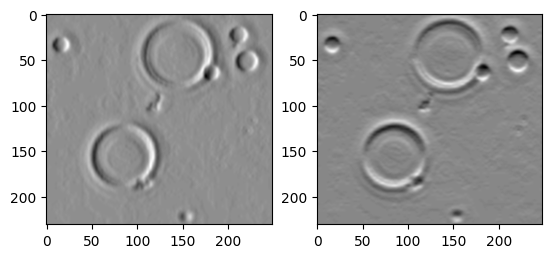

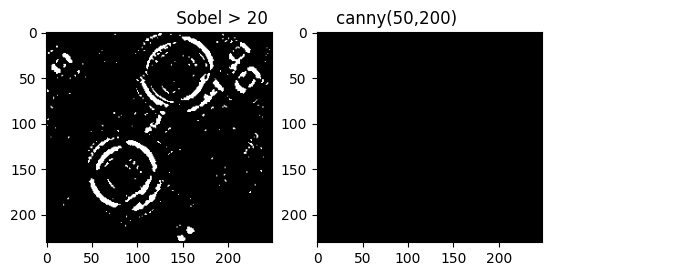

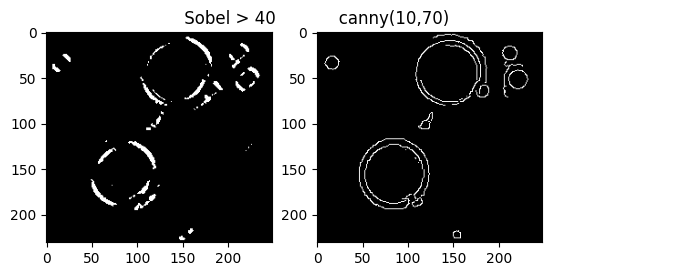

In [57]:
##Lissage Gaussien
image_blur=cv2.GaussianBlur(gray_img, (3,3), 0)

## detection de contour avec sobel
sobelx=cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=1,dy=0,ksize=5)
sobely=cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=0,dy=1,ksize=5)
sobelxy=cv2.Sobel(src=image_blur, ddepth=cv2.CV_64F, dx=1,dy=1,ksize=5)
displayTwoImages(sobelx,sobely)


##Detection de contour avec canny


_canny2= cv2.Canny(image=image_blur,threshold1=100,threshold2=200)
displayTwoImages(sobelxy>20,_canny2)
plt.title(' Sobel > 20             canny(50,200)                                            ')



_canny1= cv2.Canny(image=image_blur,threshold1=10,threshold2=70)
displayTwoImages(sobelxy>40,_canny1)
plt.title(' Sobel > 40            canny(10,70)                                            ')


Votre commentaire: 


▶Pour Sobel : le contour est plus épais et l'image est plus bruitée , de plus on n'arrive pas a avoir un countour fermé.

▶ Dans le cas de canny : En choisissant un threshold trés elevé on va etre trés selectif mais on peut remarquer qu'avec thrsh1=10 et thrsh2=70 on a une meilleure résultat avec un contour plus fin.
==> En fait Canny permet la détection de contour avec une bonne précision et c'est grace a la supression des maximas non-locaux.

==> C'est pourquoi Canny est beaucoup plus préféré.
